In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
 
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [ ]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
data['Card_Category']=le.fit_transform(data['Card_Category'])
data['Attrition_Flag']=le.fit_transform(data['Attrition_Flag'])

In [ ]:
# Naive Bayes 

training = []
testing = []
X=data.drop(['CLIENTNUM','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], axis=1)
y=data.Card_Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
# Gausian Naive Bayes
# GaussianNB implements the Gaussian Naive Bayes algorithm for classification. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

gnbtrain = gnb.score(X_train, y_train)
training.append(gnbtrain)
gnbtest = gnb.score(X_test, y_test)
testing.append(gnbtest)

print("\nTraining accuracy: ",gnbtrain)
print("\nTesting accuracy: ",gnbtest)



Training accuracy:  0.8850169300225733

Testing accuracy:  0.8854886475814413


In [ ]:
# Multinomial Naive Bayes
# The multinomial naive bayes classifier is suitable for classification with discrete features
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

mnbtrain = mnb.score(X_train, y_train)
training.append(mnbtrain)
mnbtest = mnb.score(X_test, y_test)
testing.append(mnbtest)

print("\nTraining accuracy: ",mnbtrain)
print("\nTesting accuracy: ",mnbtest)


Training accuracy:  0.7343397291196389

Testing accuracy:  0.7351102336294834


In [ ]:
# Complement Naive Bayes
# ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly 
# suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights.
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)

cnbtrain = cnb.score(X_train, y_train)
training.append(cnbtrain)
cnbtest = cnb.score(X_test, y_test)
testing.append(cnbtest)

print("\nTraining accuracy: ",cnbtrain)
print("\nTesting accuracy: ",cnbtest)


Training accuracy:  0.7576185101580135

Testing accuracy:  0.7525501809805857


In [ ]:
# Bernoulli Naive Bayes
# BernoulliNB implements the naive Bayes training and classification algorithms for data that is 
# distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features
# but each one is assumed to be a binary-valued
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_predbnb = bnb.fit(X_train, y_train).predict(X_test)

bnbtrain = bnb.score(X_train, y_train)
training.append(bnbtrain)
bnbtest = bnb.score(X_test, y_test)
testing.append(bnbtest)

print("\nTraining accuracy: ",bnbtrain)
print("\nTesting accuracy: ",bnbtest)


Training accuracy:  0.9301636568848759

Testing accuracy:  0.9341888779203685


In [ ]:
# list of train accuracy scores
print(training)

[0.8850169300225733, 0.7343397291196389, 0.7576185101580135, 0.9301636568848759]


In [ ]:
# list of test accuracy scores
print(testing)

[0.8854886475814413, 0.7351102336294834, 0.7525501809805857, 0.9341888779203685]


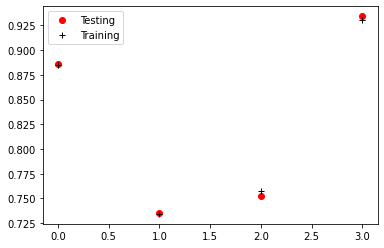

In [ ]:
plt.plot(testing, 'ro')
plt.plot(training, 'k+')
plt.legend(['Testing','Training'])

It can be observed that Bernoulli Naive Bayes gives the most accurate predicted values and has the best accuracy score, followed by Gausian Naive Bayes, then Complement Naive Bayes and finally Multinomial Naive Bayes.

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predbnb,y_test)
print(cm)

[[2839   40    3  157]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]]


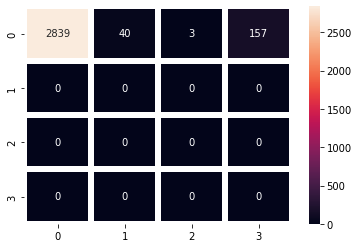

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',linecolor = 'white',linewidths=5)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_predbnb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3039
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.93      3039
   macro avg       0.25      0.23      0.24      3039
weighted avg       1.00      0.93      0.97      3039



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compared to the accuracy value of K-Nearest Neighbour of around 95% for k=2, it can be said that Bernoulli Naive Bayes classifier is less accurate compared to k nearest neighbors algorithm for this dataset of credit card customers.

